# Simple Figure Forgery 

**Description**

This notebook illustrates how to apply a Simple Figure Forgery with RSIIL.


## Implemented forgeries -- Simple:

1- Retouching:\
The process of image beautification leading to an experiment misreading.\
This modality implements contrast, brightness, and blurring adjustments that highlight or obfuscate an image region.\

    1.1 Contrast
    1.2 Brightness
    1.3 Blurring


2- Cleaning:\
The result of obfuscating a foreground object using a background region\
To apply this forgery we are going to use two common modalities:

    2.1- Brute-force: Cleaning an object using a contiguous background region.
    2.2- Inpainting (Criminisi et al. 2004). 



3- Duplication:\
The action of copying and pasting a region of an image within the same or another image, using or not
post-processing operations.\

     3.1 - Copy-Move Forgery: Copying each object respecting some affine transformation ( scale, translation, rotation, and flip)
   
     Although affine transformations are very used in real forgeries, if we combine the transformations
     without a human supervising, the result image tends to be very different from the real cases of forgery.
     Because of that, We choose to not combine those transformations.
     
     
     3.2 - Random object-to-background copy-move (Random): 
     This forgery choose n random objects from a source image and copy-paste them on random background position.
     
     3.3 - Simple Image Duplication:
     Duplicate the entire content of an image, perform retouching and/or afim transformations.
     
     3.4 - Overlap: 
     Creation of two images with an overlap region from a single one
     
     
     3.5 - Splicing: 
     Creation of an image composition that uses a donor figure’s elements into a host one
         

----

Author: João Phillipe Cardenuto\
Email: phillipe.cardenuto@ic.unicamp.br\
August, 2022
----




## Import paths

In [1]:
# Including path to forgery_lib dataset on the notebook
import sys
LIB_PATH = '../'
sys.path.append(LIB_PATH)

# Import common libraries
from forgery_lib.figure import SimpleFigureForgery
import os, json, copy, random
from PIL import Image
from glob import glob
from random import randint
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

## Read source dataset with all biological images 

In [9]:
# Reads the csv file and insert all images aspect ratio on that
dataset_dataframe = pd.read_csv('../datasetSrc.csv')

In [10]:
# Fix dataset source image paths
DATASET_PATH = '../'
dataset_dataframe['dataPath'] = DATASET_PATH + dataset_dataframe['dataPath']
dataset_dataframe['dataGTPath'] = DATASET_PATH + dataset_dataframe['dataGTPath']

## 1 - Retouching Forgeries

### 1.1 Retouching with Contrast

In [ ]:
from forgery_lib.retouching import retouching_contrast
help(retouching_contrast)


Help on function retouching_contrast in module forgery_lib.retouching.retouching:

retouching_contrast(img, objs_map, n_objects=1, alpha=None)
     Apply hard retouching contrast method on image, 
     aiming to obfuscate some objects
     
     Parameters
     ---------
     img: <np.array> Image input
     objs_map: <np.array> Map each pixel for an Object ID,
             or highlight the object (255) from the background (0)
     n_objects: <int> 
         number of objects that the retouching will be applied
    alpha: <float> [0,3] 
        Alpha value for the contrast
     
     Return
     ------
     f_img: opencv obj
         Image with retouching forgery
     gt: opencv obj
         Binary image highlighting the regions that retouching was applied
         255 -> Forgery regions
         0   -> normal



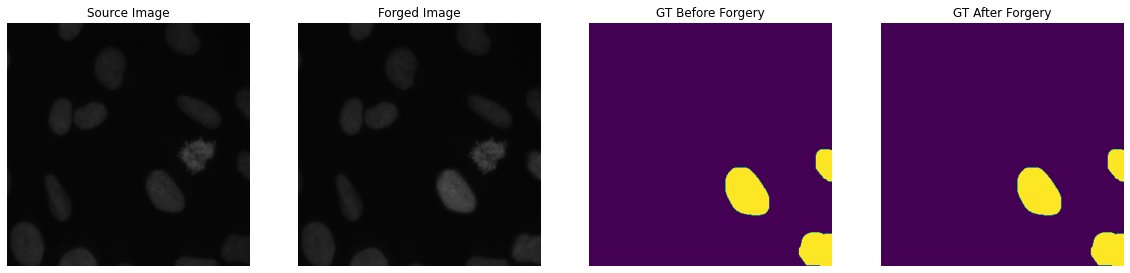

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'retouching_contrast',
  'args': {'n_objects': 3},
  'figure_type': 'simple',
  'modality': 'retouching'},
 'figure_annotations': {'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [14]:
# Function test
#####################
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]

# select an image to apply the forgery
source_img =  biologica_data_with_gt.iloc[0]

# Load Forgery info to apply in the image
# The forgery will also be included in the final forgery annotation (metadata)
forgery_info = {
    'function_name' : 'retouching_contrast',
    'args' : {'n_objects':3},
    'forgery_class': 'Microscopy',
    
}
tampering = SimpleFigureForgery(img_path=source_img.dataPath, forgery_info=forgery_info, objs_maks_path=source_img.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.forgery_img);plt.title("Forged Image");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_before_forgery);plt.title("GT Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_after_forgery);plt.title("GT After Forgery");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

### 1.2 Retouching with Brightness

In [15]:
from forgery_lib.retouching import retouching_brightness
help(retouching_brightness)


Help on function retouching_brightness in module forgery_lib.retouching.retouching:

retouching_brightness(img, objs_map, n_objects=1, bright_level=None)
     Apply hard retouching brightness method on object from an image.
     
     Parameters
     ---------
     img: <np.array> Image input
     objs_map: <np.array> Map each pixel for an Object ID,
             or highlight the object (255) from the background (0)
     n_objects: <int> 
         number of objects that the retouching will be applied
    bright_level: (optional) list of int [<int>] [-255,255] 
        Level of brightness of each obj. If the size of the list is smaller than the n_objexts, a random value will
        be generated for each missing object's brightness.
     
     Return
     ------
     f_img: opencv obj
         Image with retouching forgery
     gt: opencv obj
         Binary image highlighting the regions that retouching was applied
         255 -> Forgery regions
         0   -> normal



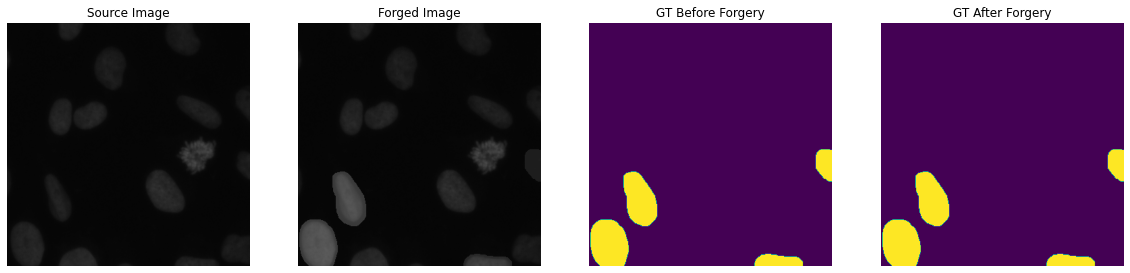

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'retouching_brightness',
  'args': {'n_objects': 4, 'bright_level': [-30, 50, 30, 20]},
  'figure_type': 'simple',
  'modality': 'retouching'},
 'figure_annotations': {'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [16]:
# Function test
#####################
# select data with object map
biologica_data_with_gt = dataset_dataframe[dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.iloc[0]
# Loading forgery infos
forgery_info = {
    'function_name' : 'retouching_brightness',
    'args' : {'n_objects':4,
             'bright_level': [-30,50,30,20]},
    'forgery_class': 'Microscopy'
}
tampering = SimpleFigureForgery(query.dataPath, forgery_info, objs_maks_path=query.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.forgery_img);plt.title("Forged Image");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_before_forgery);plt.title("GT Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_after_forgery);plt.title("GT After Forgery");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

### 1.3 Retouching with Blurring

In [17]:
from forgery_lib.retouching import retouching_blurring
help(retouching_blurring)


Help on function retouching_blurring in module forgery_lib.retouching.retouching:

retouching_blurring(img, objs_map, n_objects=1, rand=True, blur_level=4, gaussian=False)
    Apply hard retouching blurring method on image 
    aiming to obfuscate some objects
    
    Parameters
    ---------
    img: <np.array> Image input
    objs_map: <np.array> Map each pixel for an Object ID,
            or highlight the object (255) from the background (0)
    n_objects: <int> 
        number of objects that the retouching will be applied
    rand: optional <bool> = True
        Select object at random
    blur_level: optional <int> = 4
        How blurry the result region would be transformed
    gaussian: optional <bool> = False
        If True apply a gausian filter
        
    Return
    ------
    f_img: opencv obj
        Image with retouching forgery
    gt: opencv obj
        Binary image highlighting the regions that retouching was applied
        255 -> Forgery regions
        0   -> 

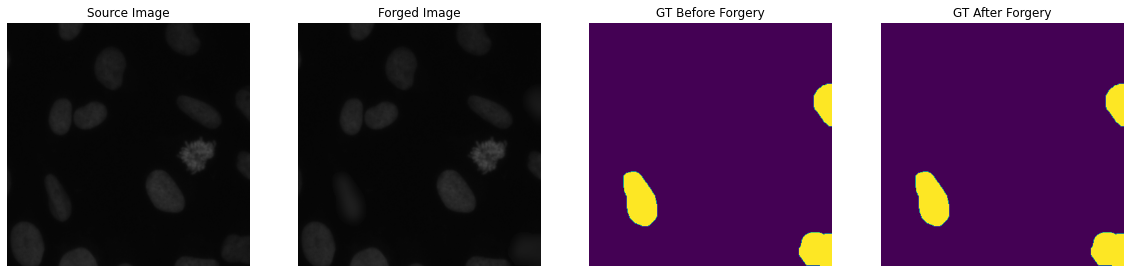

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'retouching_blurring',
  'args': {'n_objects': 3},
  'figure_type': 'simple',
  'modality': 'retouching'},
 'figure_annotations': {'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [18]:
# Function test
#####################
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.iloc[0]
# Loading forgery infos
forgery_info = {
    'function_name' : 'retouching_blurring',
    'args' : {'n_objects':3},
    'forgery_class': 'Microscopy'
}
tampering = SimpleFigureForgery(query.dataPath, forgery_info, objs_maks_path=query.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.forgery_img);plt.title("Forged Image");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_before_forgery);plt.title("GT Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_after_forgery);plt.title("GT After Forgery");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

---

## 2 - Cleaning Forgeries

In [19]:
# Including path to forgery_lib dataset on the notebook
import sys
LIB_PATH = './'
sys.path.append(LIB_PATH)

# Import common libraries
from forgery_lib.figure import SimpleFigureForgery
import os, json, copy, random
from PIL import Image
from glob import glob
from random import randint
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

### 2.1- Brute-force

In [20]:
from forgery_lib.cleaning import cleaning_using_bf
help(cleaning_using_bf)


Help on function cleaning_using_bf in module forgery_lib.cleaning.cleaning:

cleaning_using_bf(img, objs_map, n_objects=1, blur_cleaning=True)
    Cleaning using brute force
    Remove n_object from 'img', pasting on top of each a contiguos random region from the background. After this
    a Gaussian filter is applied to obfuscated the noise of the copied region (just like a human would do).
    During the multiple removals, the same background region
    is not used twice.
    
    This method return the forgery image  along with a groundtruth that indicates which object was removed, and
    which region was choose to hide the object.
    
    Warning
    -------
    Make sure to pass a uint8 image
    
    Parameters
    ----------
    img: Image object on opencv format
    
    objs_map:Image object on opencv format 
        Binary map, indicating the region of all objects on 'img'
    
    n_objects: int
        Maximum number of objects that will be removed.
        The objects ar

### <highlight>Important</highlight>


For duplication each copied object in the ground truth appears with a different id

The ids are represented as a different color in their ground truth (image below)

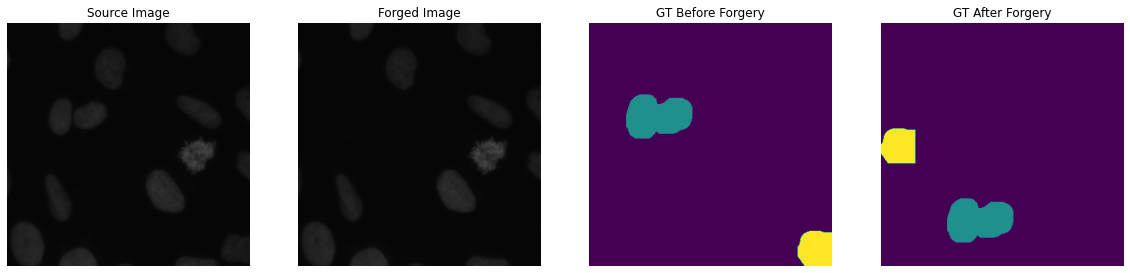

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'cleaning_using_bf',
  'args': {'n_objects': 3},
  'figure_type': 'simple',
  'modality': 'cleaning'},
 'figure_annotations': {'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [22]:
# Function test
#####################
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.iloc[0]
# Loading forgery infos
forgery_info = {
    'function_name' : 'cleaning_using_bf',
    'args' : {'n_objects':3},
    'forgery_class': 'Microscopy'
}
tampering = SimpleFigureForgery(query.dataPath, forgery_info, objs_maks_path=query.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.forgery_img);plt.title("Forged Image");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_before_forgery);plt.title("GT Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_after_forgery);plt.title("GT After Forgery");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

### 2.2- Inpainting (Criminisi et al. 2004). 

In [23]:
from forgery_lib.cleaning import cleaning_with_inpainting
help(cleaning_with_inpainting)


Help on function cleaning_with_inpainting in module forgery_lib.cleaning.cleaning:

cleaning_with_inpainting(img, objs_map, n_objects=1, enlarge_size=50, message=False)
    Remove n_object from 'img', using the inpainting method 
    Object Removal by Exemplar-Based Inpainting Criminisi et al. (2003)
    For a more accurate result, the algorithm selects a rectangle region around
    the mask that cover all the mask.
    
    This method return the forgery image  along with a groundtruth that 
    indicates which object was removed, and which region was choose to hide 
    the object.
    
    Warning
    -------
    This method might take some time per object to perform inpaiting 
    
    Parameters
    ----------
    img: Image object on opencv format
    
    objs_map:Image object on opencv format 
        Binary map, indicating the region of all objects on 'img'
    
    n_objects: int
        Maximum number of objects that will be removed.
        The objects are randomly selected

### <highlight>Important</highlight>

Cleaning with inpaiting takes time to run (about 20sec)

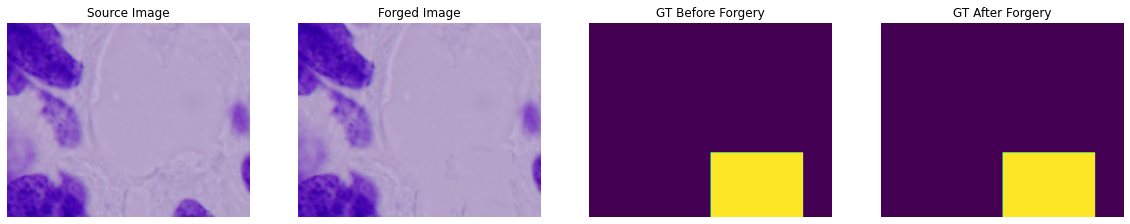

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'cleaning_with_inpainting',
  'args': {'n_objects': 1},
  'figure_type': 'simple',
  'modality': 'cleaning'},
 'figure_annotations': {'height': 256,
  'width': 320,
  'image_id': '../srcDataset/00056.png'}}

In [24]:
# Function test
#####################
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['color'])]
# select a query
query =  biologica_data_with_gt.iloc[7]
# Loading forgery infos
forgery_info = {
    'function_name' : 'cleaning_with_inpainting',
    'args' : {'n_objects':1},
    'forgery_class': 'Microscopy'
}
tampering = SimpleFigureForgery(query.dataPath, forgery_info, objs_maks_path=query.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.forgery_img);plt.title("Forged Image");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_before_forgery);plt.title("GT Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_after_forgery);plt.title("GT After Forgery");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

-----

## 3 - Duplication Forgeries

In [25]:
# Including path to forgery_lib dataset on the notebook
import sys
LIB_PATH = './'
sys.path.append(LIB_PATH)

# Import common libraries
from forgery_lib.figure import SimpleFigureForgery
import os, json, copy, random
from PIL import Image
from glob import glob
from random import randint
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

### 3.1 - Object Copy-Move Forgery with Afine Transformations

In [26]:
from forgery_lib.duplication import copy_move_forgery
help(copy_move_forgery)


Help on function copy_move_forgery in module forgery_lib.duplication.copy_move:

copy_move_forgery(img, objs_map, t_types, n_objects=1)
    Perform a copy move forgery on 'img' following the transformation pass 
    on the input dictionary t_types.
    
    Parameters
    ---------
    img: opencv python object 
    objs_map:opencv python object 
        binary image containing the segmentated version of the foreground
    n_objects: int
        Number of objects to perform the copy_move
    t_types: dict - Transformation Types
        {
        'translation': Tuple(<int>,<int>) in [im.shape[0],im.shape[1]],
        'rotation': <int>  in [0,360],
        'scale' : <float>,
        'flip': <bool>,
        }
        Note that 'flips', 'translation' and 'rotation' are individually
        applied. To avoid many overlaps between the objects, we not allow those 
        transformatios to be applied together on the same image.
        
    Result
    ------
    f_img: cv2 image obj
        I

In [28]:
def set_affine_transformation(choice):
    """
    This function selects at random three different affine functions, with random params.
    We do not allow different affine functions to be applied simultaneously.
    """
    if choice == 'flip':
        t_types = { 'flip': True  }
    elif choice == 'translation':
        t_types = {
            'translation': (randint(20,img.shape[0]//5), randint(20,img.shape[1]//5)),
            'scale' : randint(1,3),
            }
    else:
        t_types = {
        'rotation': randint(30,90),
        'scale' : randint(1,3),
        }
    return t_types
        

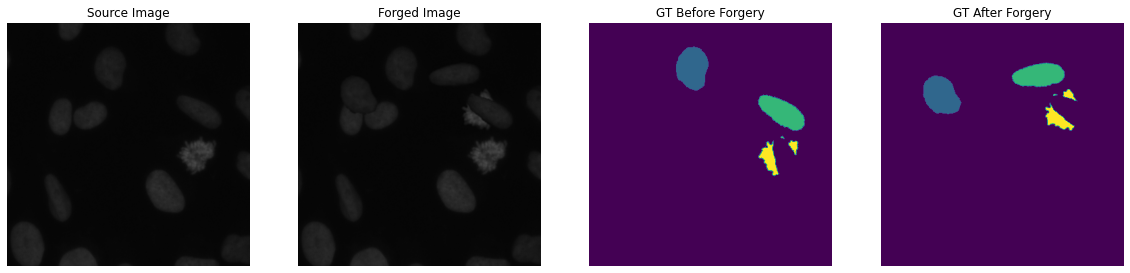

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'copy_move_forgery',
  'args': {'n_objects': 3, 't_types': {'rotation': 38, 'scale': 1}},
  'figure_type': 'simple',
  'modality': 'duplication'},
 'figure_annotations': {'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [29]:
# Function test
#####################
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.iloc[0]
# Loading forgery infos
forgery_info = {
    'function_name' : 'copy_move_forgery',
    'args' : {'n_objects':3,
               't_types': set_affine_transformation('rotation')
             },
    'forgery_class': 'Microscopy'
}
tampering = SimpleFigureForgery(query.dataPath, forgery_info, objs_maks_path=query.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.forgery_img);plt.title("Forged Image");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_before_forgery);plt.title("GT Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_after_forgery);plt.title("GT After Forgery");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

### 3.2 - Copy-Move Random Object-to-background

In [30]:
from forgery_lib.duplication import random_copy_move
help(random_copy_move)


Help on function random_copy_move in module forgery_lib.duplication.copy_move:

random_copy_move(img, objs_map, n_objects=1, poisson=False)
    Performs a copy-move selecting at random n_objects from the objs_map
    and pasting it on background regions
    
    Warning
    -------
    Make sure to pass a uint8 image
    
    Parameters
    ----------
    img: Image object on opencv format
    
    objs_map:Image object on opencv format 
        Binary map, indicating the region of all objects on 'img'
    
    n_objects: int
        Maximum number of objects that will be copy-moved.
        The objects are randomly selected.
        This method does not guarantee that n_objects are copy-moved,
        because there may not have enough background area to do this.
    poisson: <bool> optional = False
        Apply poisson blend during the copy-move
    
    Return
    ------
    f_img: opencv Image object
        Image with the cleanned applied
    bg_gt : opencv Image object
        Ma

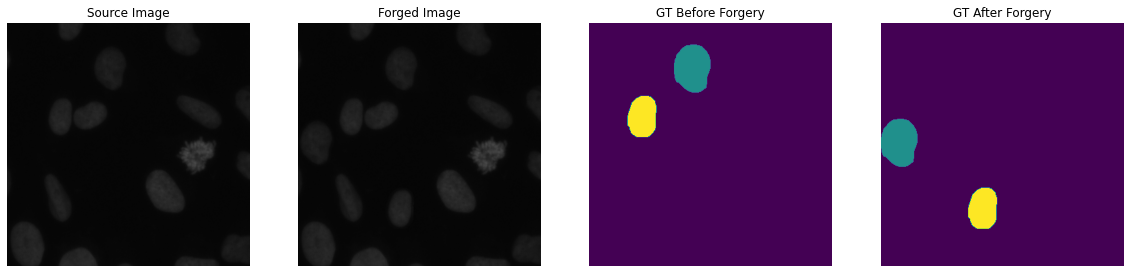

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'random_copy_move',
  'args': {'n_objects': 3},
  'figure_type': 'simple',
  'modality': 'duplication'},
 'figure_annotations': {'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [31]:
# Function test
#####################
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.iloc[0]
# Loading forgery infos
forgery_info = {
    'function_name' : 'random_copy_move',
    'args' : {'n_objects':3
             },
    'forgery_class': 'Microscopy'
}
tampering = SimpleFigureForgery(query.dataPath, forgery_info, objs_maks_path=query.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.forgery_img);plt.title("Forged Image");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_before_forgery);plt.title("GT Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_after_forgery);plt.title("GT After Forgery");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

### 3.3 - Simple Image Duplication


In [32]:
from forgery_lib.duplication import simple_copy
help(simple_copy)


Help on function simple_copy in module forgery_lib.duplication.image_duplication:

simple_copy(img, operations)
    Perfom a simple copy of the entery input image addressing any operation from the dict 
    operations.
    
    Parameters
    ---------
    img: cv2 source img
    operations:dict
        Operations applied on mask1 contains:
        {
            flip: <boolean>
            rotation: <False|| None || CV2 rotation flag>
                -> [ 'ROTATE_180' , 'ROTATE_90_CLOCKWISE', 
                            'ROTATE_90_COUNTERCLOCKWISE']
            brightness: <int>
            }
    Return
    ------
    src_img: cv2 img obj
        image region of 'im' using operations from 'operation1'
    src_mask1: Binary image 
        represent the regions from the source image that was manipulated
        before the manipulation
    
    forgery_img: cv2 img obj
        Forgery version of the src_img using 'operations'
    forgery_gt: Binary image
        represent the regions fro

In [33]:
def set_simple_copy_operation(rot):
    """
    This function randomly selects the value for rotation, flippingm and brighteness, 
    to be applied in the copy_moving.
    """
    
    if rot=='flip':
        operations = { 'flip': True,
                      'brightness' : randint(0,30) }
    elif rot=='rotation180':
        operations = { 
                      'rotation': 'ROTATE_180',
                      'brightness' : randint(0,30) }
    elif rot=='rotation90':
        operations = { 'flip': False,
                      'rotation': random.choice([ 'ROTATE_90_CLOCKWISE', 'ROTATE_90_COUNTERCLOCKWISE']),
                      'brightness' : randint(0,30) }
    elif rot=='flip90':
        operations = { 'flip': True,
                      'rotation': random.choice([ 'ROTATE_90_CLOCKWISE', 'ROTATE_90_COUNTERCLOCKWISE']),
                      'brightness' : randint(0,30) }
  
    else:
        operations = { 'flip':False,
                      'rotation': None,
                      'brightness' : randint(0,30) 
                     }
    return operations

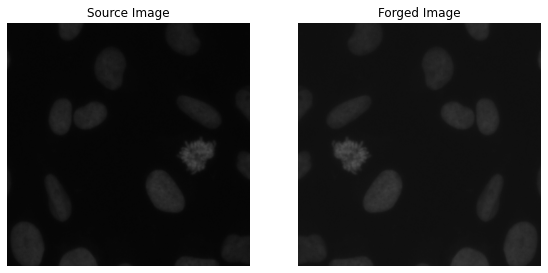

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'simple_copy',
  'args': {'operations': {'flip': True, 'brightness': 10}},
  'figure_type': 'simple',
  'modality': 'duplication'},
 'figure_annotations': {'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [34]:
# Function test
#####################
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.iloc[0]
# Loading forgery infos
forgery_info = {
    'function_name' : 'simple_copy',
    'args' :  {'operations': set_simple_copy_operation(rot='flip')},
    'forgery_class': 'Microscopy'
}
tampering = SimpleFigureForgery(query.dataPath, forgery_info, objs_maks_path=query.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.forgery_img);plt.title("Forged Image");plt.axis('off')
# plt.subplot(1, 4, 3); plt.imshow(tampering.gt_before_forgery);plt.title("GT Before Forgery");plt.axis('off')
# plt.subplot(1, 4, 4); plt.imshow(tampering.gt_after_forgery);plt.title("GT After Forgery");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

### 3.4 - Overlap


In [35]:
from forgery_lib.duplication import overlap_forgery
help(overlap_forgery)


Help on function overlap_forgery in module forgery_lib.duplication.overlap:

overlap_forgery(img, operation1, operation2)
    From a source image 'img' perform two types of operations aiming to create 2 cropped versions
    from 'img'.
    Flip and rotaiton are not allowed at the same time. If both were declared just the flip will be done.
    
    Parameters
    ---------
    img: cv2 img
    operation1:dict
        Operations applied on mask1 contains:
            {
            flip: <boolean>
            rotation: <False|| None || CV2 rotation flag>
                 -> [ 'ROTATE_180' , 'ROTATE_90_CLOCKWISE', 
                            'ROTATE_90_COUNTERCLOCKWISE']
            crop_type:<str>  
                    -> ['top_right', 'top_left', 'center']
                    
            brightness: <int>
            }
    operation2: dict
        Operations applied on mask2 contains:
        {
            flip: <boolean>
            rotation: <False|| None || CV2 rotation flag>
     

In [36]:
def set_overlap_operations(crop_type1 ):
    """
    Select two possibles operations to apply the overlap function
    """
    CROP_TYPES = ['top_right', 'top_left', 'center']
    ROT_TYPES = [ 'ROTATE_180' , 'ROTATE_90_CLOCKWISE', 
                            'ROTATE_90_COUNTERCLOCKWISE']
    
    if crop_type1 in CROP_TYPES:
        CROP_TYPES.remove(crop_type1)
        
    operation2 = {
                'crop_type': random.choice(CROP_TYPES) ,
                'flip': bool(randint(0,1)),
                'rotation': random.choice(ROT_TYPES),
                'brightness': randint(10,30),

            }
    return operation2

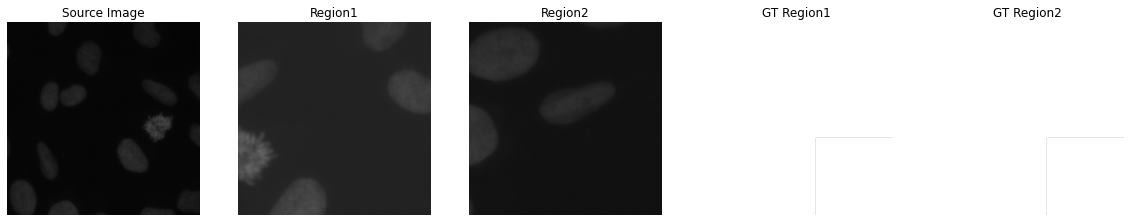

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'overlap_forgery',
  'args': {'operation1': {'crop_type': 'center',
    'flip': True,
    'rotation': 'ROTATE_90_CLOCKWISE',
    'brightness': 28},
   'operation2': {'crop_type': 'top_left',
    'flip': False,
    'rotation': 'ROTATE_90_CLOCKWISE',
    'brightness': 11}},
  'figure_type': 'simple',
  'modality': 'duplication'},
 'figure_annotations': {'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [41]:
# Function test
###############
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.iloc[0]
# Loading forgery infos
crop1 = set_overlap_operations(crop_type1=None)
forgery_info = {
    'function_name' : 'overlap_forgery',
    'args' :  {'operation1': set_overlap_operations(crop_type1=None),
              'operation2':  set_overlap_operations(crop_type1=crop1)
             },
    'forgery_class': 'Microscopy'
}
tampering = SimpleFigureForgery(query.dataPath, forgery_info, objs_maks_path=query.dataGTPath)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 5, 1); plt.imshow(tampering.src_image);plt.title("Source Image");plt.axis('off')
plt.subplot(1, 5, 2); plt.imshow(tampering.region1);plt.title("Region1");plt.axis('off')
plt.subplot(1, 5, 3); plt.imshow(tampering.region2);plt.title("Region2");plt.axis('off')
# plt.subplot(1, 5, 4); plt.imshow(tampering.region1_gt);plt.title("GT Region1");plt.axis('off')
# plt.subplot(1, 5, 5); plt.imshow(tampering.region2_gt);plt.title("GT Region2");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()

### 3.5 - Splicing

In [43]:
from forgery_lib.duplication import splicing_forgery
help(splicing_forgery)


Help on function splicing_forgery in module forgery_lib.duplication.splicing:

splicing_forgery(donor, donor_map, host, host_map, n_objects=1)
    Apply a splicing forgery from donor to host using n_objecrs form donor.
    The method selects an object from the donor using the donor_map 
    and paste it on a background region of host. To find a suitable background region
    the method uses the host_map.
    If it is not possible to select a background region that any object from the donor fits
    ,then then the returning maps will containg only zeros.
        
    Warning
    -------
    Make sure to pass a uint8 image
    
    Parameters
    ----------
    donor : image opencv obj
        Source of the object that will be placed on im_dest
    donor_map: A binary image in opencv format
        This binary map indicates where the objects are in the im_src
        255 -> object
        0   -> background
    host: image opencv obj
        Image that will be tampered
    host_map: A bin

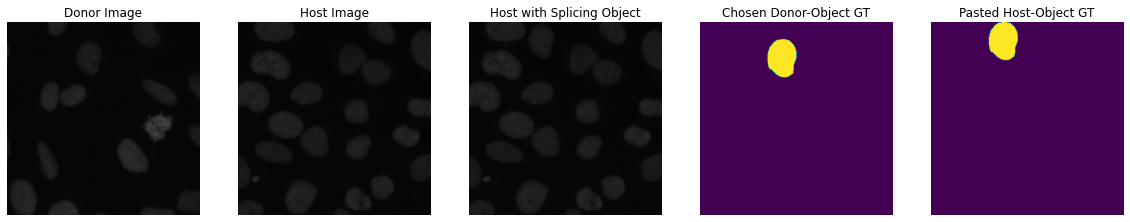

Metadata:


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'splicing_forgery',
  'args': {'n_objects': 10},
  'figure_type': 'simple',
  'modality': 'duplication'},
 'figure_annotations': {'donor_id': '../srcDataset/00001.png',
  'host_id': '../srcDataset/00004.png',
  'height': 360,
  'width': 360,
  'image_id': '../srcDataset/00001.png'}}

In [44]:
# Function test
#####################
# Get a splicing pair
# select data with object map
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
donor_row = biologica_data_with_gt.iloc[0]
host_row = biologica_data_with_gt.iloc[3]

# Loading forgery info
forgery_info = {
    'function_name' : 'splicing_forgery',
    'donor_img_path': donor_row['dataPath'],
    'donor_obj_path': donor_row['dataGTPath'],
    'host_img_path': host_row['dataPath'],
    'host_obj_path': host_row['dataGTPath'],

    'args' : {
        'n_objects': 10
             },
    'forgery_class': 'Microscopy'
}

# Apply splicing
tampering = SimpleFigureForgery(img_path=None,forgery_info=forgery_info)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 5, 1); plt.imshow(tampering.donor_img);plt.title("Donor Image");plt.axis('off')
plt.subplot(1, 5, 2); plt.imshow(tampering.host_img);plt.title("Host Image");plt.axis('off')
plt.subplot(1, 5, 3); plt.imshow(tampering.forgery_img);plt.title("Host with Splicing Object");plt.axis('off')
plt.subplot(1, 5, 4); plt.imshow(tampering.donor_objects_gt);plt.title("Chosen Donor-Object GT");plt.axis('off')
plt.subplot(1, 5, 5); plt.imshow(tampering.host_objects_gt);plt.title("Pasted Host-Object GT");plt.axis('off')
plt.show()
print("Metadata:")
tampering.get_forgery_metadata()